<a href="https://colab.research.google.com/github/Aravinth-Megnath/Rice_Category/blob/main/Rice_category_prediction_fastai_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'multi-class-rice-image-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4478769%2F7677528%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240303%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240303T072026Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D67035dcbedce4225e93db2afcaf40bb95cd390268ef1a11ffa252b520f90719d02c8314ca585c9ac1f791b936566810c8b034806642c2965567a7b93a92b81669b1b66b18e987fe858472b7467a4f61b65102fe16d8cdf510b4deb9439d6eb30a730349149f8f948a92ffa66eb6c0b861b08694690ab1bd7232c80b441402728096f340f75f26728f4daebc7da91d8cce5e2f24895c65dde338b4dfaf42cc15e0c86c3f6b7f9f534b15e0a985874e2cec5be9fab7ed9242d8ef11e358d1bceed0ba979e31eacfdb24128b4487726cb73b769a6c2d4b95346e303cef7373a01615f267c837117c791a1f24e916db2153dd0c0ae6f52da8c0328a6ddcb1123b0c9'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 137198593 bytes downloaded
Downloaded and uncompressed: multi-class-rice-image-dataset
Data source import complete.


In [27]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/multi-class-rice-image-dataset/Validation/Karacadag/11359.jpg
/kaggle/input/multi-class-rice-image-dataset/Validation/Karacadag/10424.jpg
/kaggle/input/multi-class-rice-image-dataset/Validation/Karacadag/11025.jpg
/kaggle/input/multi-class-rice-image-dataset/Validation/Karacadag/11383.jpg
/kaggle/input/multi-class-rice-image-dataset/Validation/Karacadag/11404.jpg
/kaggle/input/multi-class-rice-image-dataset/Validation/Karacadag/10907.jpg
/kaggle/input/multi-class-rice-image-dataset/Validation/Karacadag/10991.jpg
/kaggle/input/multi-class-rice-image-dataset/Validation/Karacadag/12071.jpg
/kaggle/input/multi-class-rice-image-dataset/Validation/Karacadag/11419.jpg
/kaggle/input/multi-class-rice-image-dataset/Validation/Karacadag/10903.jpg
/kaggle/input/multi-class-rice-image-dataset/Validation/Karacadag/12049.jpg
/kaggle/input/multi-class-rice-image-dataset/Validation/Karacadag/10075.jpg
/kaggle/input/multi-class-rice-image-

In [2]:
!pip install -Uqq fastai
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 25.2 MB/s eta 0:00:00


In [3]:
import timm
from fastai.vision.all import*

In [7]:
path = '/kaggle/input/multi-class-rice-image-dataset/Train'
files = get_image_files(path)
len(files)

50000

In [8]:
dls  = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2),
    get_y = parent_label,
    item_tfms = [Resize(192, method = 'squish')]).dataloaders(path)

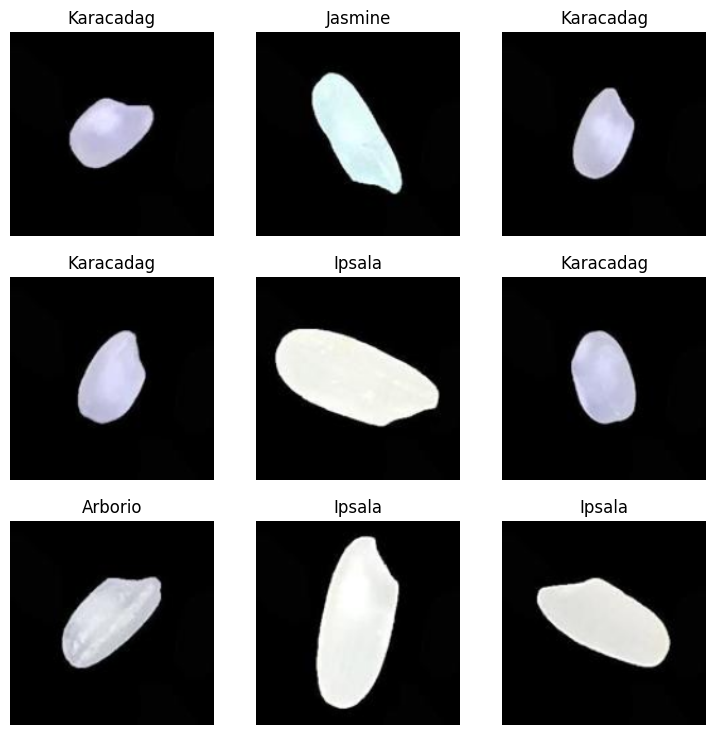

In [9]:
dls.show_batch()

In [10]:
learn = vision_learner(dls, 'resnet50', metrics = accuracy)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

In [11]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.137539,0.062124,0.977600,04:00


epoch,train_loss,valid_loss,accuracy,time
0,0.067731,0.039989,0.986200,05:16
1,0.050368,0.030277,0.990400,05:15
2,0.032625,0.020141,0.993000,05:17
3,0.021632,0.014844,0.995200,05:16
4,0.025016,0.015976,0.994500,05:16


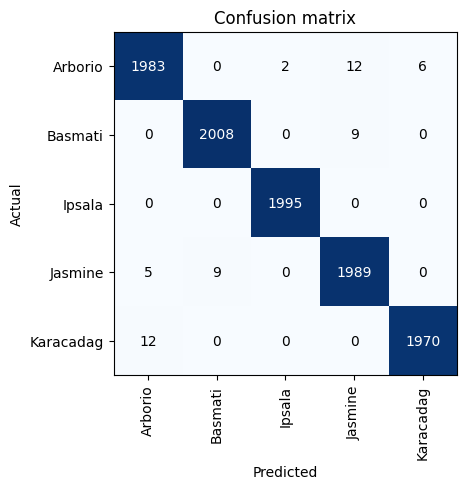

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

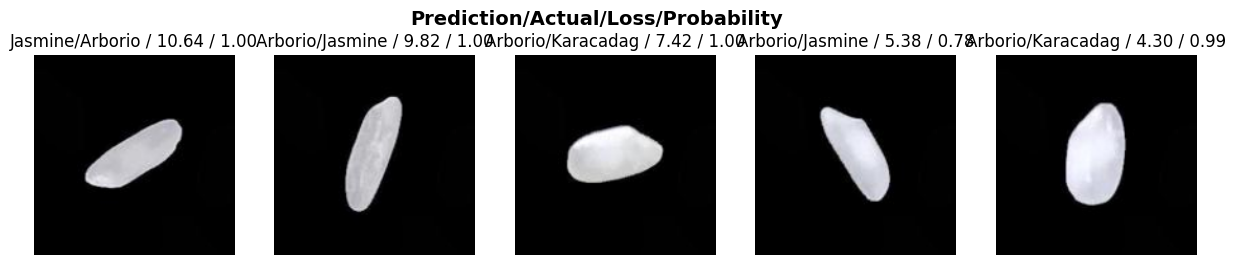

In [13]:

interp.plot_top_losses(5, nrows=1)

In [14]:
from fastai.vision.widgets import *

In [15]:
learn.export()


In [16]:
learn = load_learner('export.pkl')

In [ ]:
labels = learn.dls.vocab
labels

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

In [17]:
test_path = '/kaggle/input/multi-class-rice-image-dataset/Test/Jasmine/12510.jpg'
learn.predict(test_path)

('Jasmine',
 tensor(3),
 tensor([5.2251e-07, 5.4225e-05, 4.7453e-09, 9.9995e-01, 2.3340e-09]))

In [18]:
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i] : float(probs[i]) for i in range(len(labels))}

In [19]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.9/307.9 kB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 12.5 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl s

In [20]:
!pip install --upgrade pip
!pip install --upgrade setuptools
!pip install --upgrade gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 14.1 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [ ]:
import gradio as gr
gr.Interface(fn=predict, inputs=gr.inputs.Image(shape=(512, 512)), outputs=gr.outputs.Label(num_top_classes=3)).launch(share=True)

AttributeError: module 'gradio' has no attribute 'inputs'

In [26]:
import gradio as gr
import os


def image_mod(image):
    return image.rotate(45)


demo = gr.Interface(
    image_mod,
    gr.Image(type="pil"),
    "image",
    flagging_options=["blurry", "incorrect", "other"],
    examples=['/content/test.jpg'
          ],
)

if __name__ == "__main__":
    demo.launch()



Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://eb01daeeac3323601d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [23]:
import gradio as gr
demo = gr.Interface(fn=predict, inputs="image", outputs="label")
demo.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://92e57a8a8eaa7decec.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [24]:
import gradio as gr
from fastai.vision.all import *
import skimage

learn = load_learner('export.pkl')

labels = learn.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

title = "Rice Category Classifier"
description = "A pet breed classifier trained on the Oxford Pets dataset with fastai. Created as a demo for Gradio and HuggingFace Spaces."
article="<p style='text-align: center'><a href='https://tmabraham.github.io/blog/gradio_hf_spaces_tutorial' target='_blank'>Blog post</a></p>"
examples = ['siamese.jpg']
interpretation='default'
enable_queue=True

gr.Interface(fn=predict,inputs=gr.inputs.Image(shape=(512, 512)),outputs=gr.outputs.Label(num_top_classes=5),
             title=title,description=description,article=article,
             examples=examples,interpretation=interpretation,enable_queue=enable_queue).launch()

AttributeError: module 'gradio' has no attribute 'inputs'